<a href="https://colab.research.google.com/github/agatagera/Analiza-Cen-Energi/blob/main/ceny_energii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
uploaded = files.upload()

Saving tge_rdb_energy_prices.csv to tge_rdb_energy_prices.csv


In [16]:
#Load the data
df = pd.read_csv(io.BytesIO(uploaded['tge_rdb_energy_prices.csv']))
df.head()

,index,Min. price [PLN/MWh],Max. price [PLN/MWh],Last price [PLN/MWh],Volume [MWh],index_utc
0,2020-08-28 00:00:00,150.02,167.67,167.67,800.0,NaN
1,2020-08-28 01:00:00,132.37,172.52,132.37,900.0,NaN
2,2020-08-28 02:00:00,119.31,172.52,121.91,900.0,NaN
3,2020-08-28 03:00:00,131.49,211.80,147.99,782.0,NaN
4,2020-08-28 04:00:00,136.12,217.75,147.99,665.0,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26719 entries, 0 to 26718
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 26719 non-null  object 
 1   Min. price [PLN/MWh]  24691 non-null  float64
 2   Max. price [PLN/MWh]  24691 non-null  float64
 3   Last price [PLN/MWh]  24691 non-null  float64
 4   Volume [MWh]          26719 non-null  float64
 5   index_utc             14712 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.2+ MB


In [18]:
df.describe()

,Min. price [PLN/MWh],Max. price [PLN/MWh],Last price [PLN/MWh],Volume [MWh]
count,24691.000000,24691.000000,24691.000000,26719.000000
mean,378.914067,442.534553,410.091459,373.662169
std,184.884898,205.721699,193.004829,675.650730
min,-2138.450000,-295.110000,-430.000000,0.000000
25%,259.455000,308.740000,283.525000,68.800000
50%,360.010000,412.460000,384.840000,233.900000
75%,471.175000,541.980000,505.370000,493.000000
max,2269.040000,3222.400000,2683.700000,32743.600000


In [19]:
min_data = min(df['index'])
max_data = max(df['index'])
print(min_data)
print(max_data)

2020-08-28 00:00:00
2024-10-18 23:00:00


In [ ]:
#rozdzielenie godziny i daty

In [20]:
# Konwersja kolumny 'index' na format daty
df['index'] = pd.to_datetime(df['index'])

In [21]:
# Rozdzielenie na kolumnę 'data' i 'godzina'
df['data'] = df['index'].dt.date
df['godzina'] = df['index'].dt.time

In [22]:
df.head()

,index,Min. price [PLN/MWh],Max. price [PLN/MWh],Last price [PLN/MWh],Volume [MWh],index_utc,data,godzina
0,2020-08-28 00:00:00,150.02,167.67,167.67,800.0,NaN,2020-08-28,00:00:00
1,2020-08-28 01:00:00,132.37,172.52,132.37,900.0,NaN,2020-08-28,01:00:00
2,2020-08-28 02:00:00,119.31,172.52,121.91,900.0,NaN,2020-08-28,02:00:00
3,2020-08-28 03:00:00,131.49,211.80,147.99,782.0,NaN,2020-08-28,03:00:00
4,2020-08-28 04:00:00,136.12,217.75,147.99,665.0,NaN,2020-08-28,04:00:00


In [23]:
df = df.drop('index', axis=1)
df = df.drop('index_utc', axis=1)

In [24]:
df.head()

,Min. price [PLN/MWh],Max. price [PLN/MWh],Last price [PLN/MWh],Volume [MWh],data,godzina
0,150.02,167.67,167.67,800.0,2020-08-28,00:00:00
1,132.37,172.52,132.37,900.0,2020-08-28,01:00:00
2,119.31,172.52,121.91,900.0,2020-08-28,02:00:00
3,131.49,211.80,147.99,782.0,2020-08-28,03:00:00
4,136.12,217.75,147.99,665.0,2020-08-28,04:00:00


In [26]:
df.dtypes

,0
Min. price [PLN/MWh],float64
Max. price [PLN/MWh],float64
Last price [PLN/MWh],float64
Volume [MWh],float64
data,object
godzina,object


In [31]:
# Konwersja kolumny 'data' na format datetime
df['data'] = pd.to_datetime(df['data'])

# Usunięcie wierszy z datą sprzed 20 października 2022
df = df[df['data'] >= '2022-10-20']


In [33]:
min_data = min(df['data'])
print(min_data)

2022-12-05 00:00:00


In [36]:
avg_last_price_by_hour = df.groupby('godzina')['Last price [PLN/MWh]'].mean()

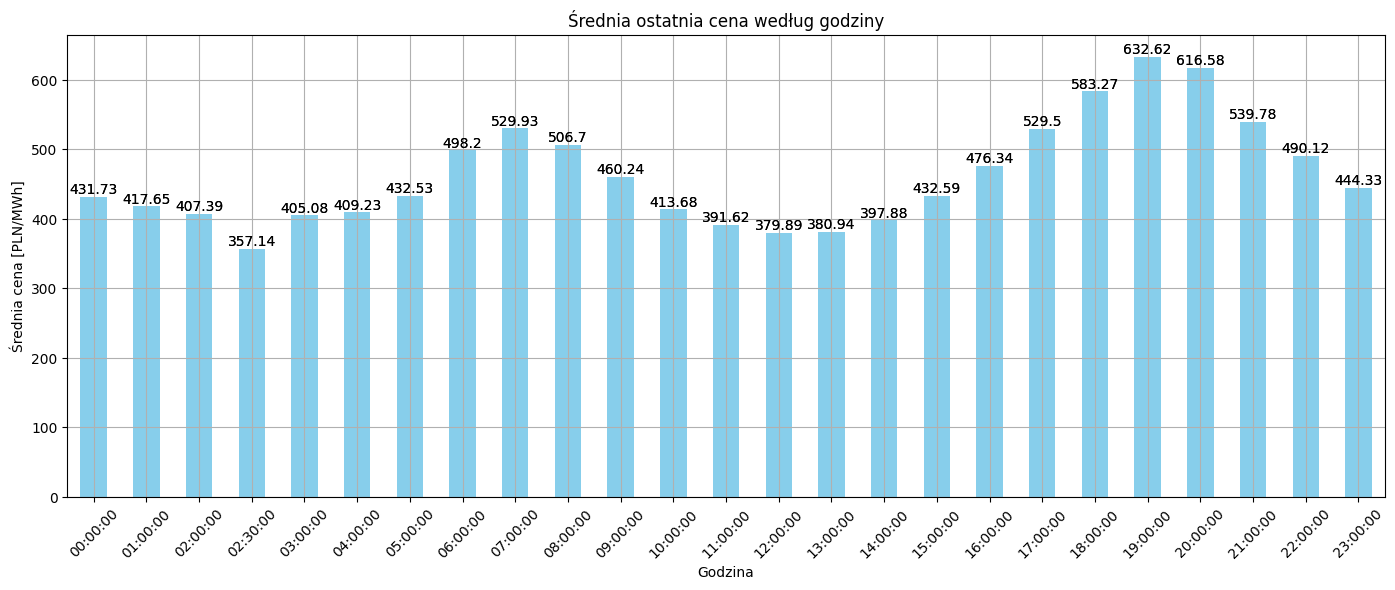

In [56]:
plt.figure(figsize=(17,6))
avg_last_price_by_hour.plot(kind='bar', color='skyblue')
bars = avg_last_price_by_hour.plot(kind='bar', color='skyblue')
for bar in bars.patches:
    # Dodajemy wartość średniej ceny nad każdym słupkiem
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom')
plt.title('Średnia ostatnia cena według godziny')
plt.xlabel('Godzina')
plt.ylabel('Średnia cena [PLN/MWh]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Tworzenie wykresu
plt.figure(figsize=(10, 6))

# Rysowanie wykresu słupkowego
avg_last_price_by_hour.plot(kind='bar', color='skyblue', label='Średnia cena (słupki)', alpha=0.7)

# Rysowanie wykresu liniowego na tym samym wykresie
avg_last_price_by_hour.plot(kind='line', color='red', label='Średnia cena (linia)', marker='o')

# Ustawienia wykresu
plt.title('Średnia ostatnia cena według godziny')
plt.xlabel('Godzina')
plt.ylabel('Średnia cena [PLN/MWh]')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # Dodaje legendę do wykresu

# Wyświetlanie wykresu
plt.tight_layout()  # Uporządkowuje elementy wykresu
plt.show()

In [38]:
avg_max_price_by_hour = df.groupby('godzina')['Max. price [PLN/MWh]'].mean()

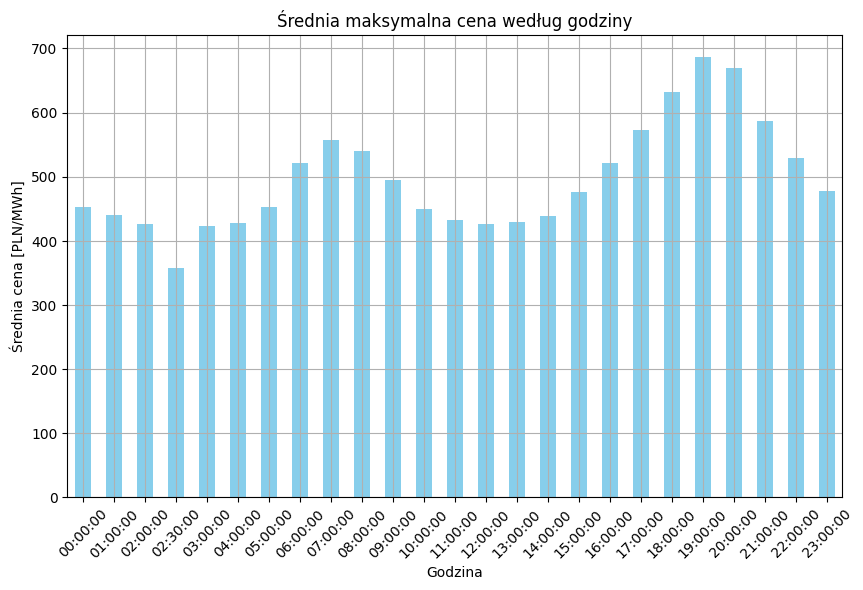

In [41]:
plt.figure(figsize=(10,6))
avg_max_price_by_hour.plot(kind='bar', color='skyblue')
plt.title('Średnia maksymalna cena według godziny')
plt.xlabel('Godzina')
plt.ylabel('Średnia cena [PLN/MWh]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [40]:
avg_min_price_by_hour = df.groupby('godzina')['Min. price [PLN/MWh]'].mean()

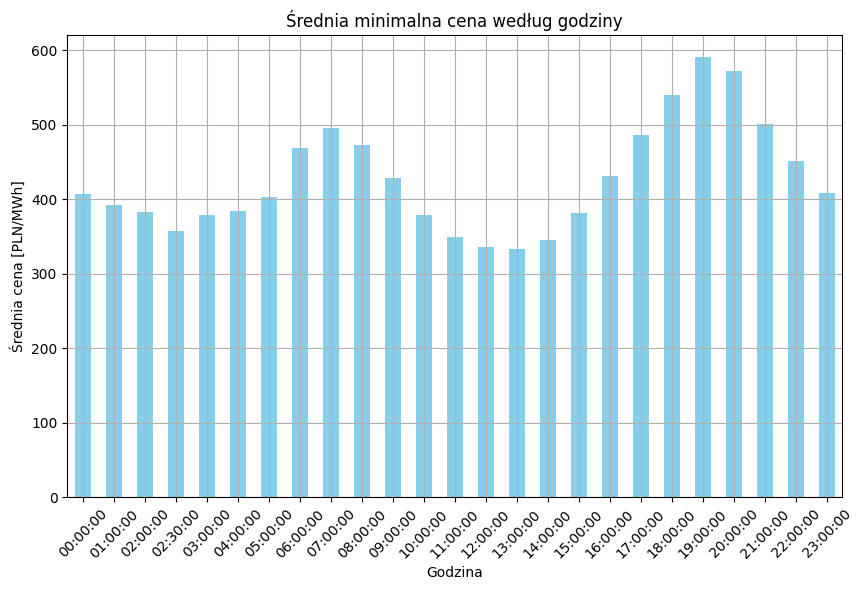

In [42]:
plt.figure(figsize=(10,6))
avg_min_price_by_hour.plot(kind='bar', color='skyblue')
plt.title('Średnia minimalna cena według godziny')
plt.xlabel('Godzina')
plt.ylabel('Średnia cena [PLN/MWh]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()